In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## 1. Data Cleaning

In [2]:
df = pd.read_csv('data/full_extra.csv')
df.head()

,Địa điểm,Phân Loại,Phòng ngủ,Phòng tắm,Hướng,Hiện trạng nhà,Giấy tờ,Kết cấu nhà,Diện tích đất,Diện tích sử dụng,Chiều dài,Chiều rộng,Độ rộng hẻm,Độ rộng mặt tiền đường,Khác,Giá,Giá/m2
0,quan-2,"Chính chủ bán căn thô 3 phòng ngủ, tầng cao view đẹp, Palm Heights, phường An Phú, Quận 2.",3,2,T.Bắc,Để trống,Khác,--,--,105 m²,--,--,--,--,"Gần chợ, siêu thị. Gần trường học. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh",6 tỷ,"57,1 triệu/m²"
1,quan-2,"Bán nhà cấp 4 nở hậu, căn góc 2 măt tiền đường xe hơi phường Bình An, Quận 2.",4,4,Đông,Đang cho thuê,Sổ hồng,1 trệt,103 m²,103 m²,19.0 m,5.3 m,--,12.0 m,"Gần chợ, siêu thị. Gần trường học. Nở hậu. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Khu vực an ninh, yên tĩnh","9,8 tỷ","95,1 triệu/m²"
2,quan-2,"Bán căn góc, 3 phòng ngủ, nội thất tiện nghi, chung cư Kris Vue, phường Bình Trưng Đông, Quận 2.",3,2,T.Bắc,Đang ở,Sổ hồng,--,--,99 m²,--,--,--,--,"Gần chợ, siêu thị. Gần trường học. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh","4,15 tỷ","41,9 triệu/m²"
3,quan-2,"Cần bán căn hộ chung cư Citi Home Cát Lái, 2 phòng ngủ 1WC, view Landmark 81.",2,1,Bắc,Để trống,Sổ hồng,--,--,"57,2 m²",--,--,--,--,"Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh","1,7 tỷ","29,7 triệu/m²"
4,quan-2,"Bán căn hộ nội thất cơ bản dự án Thủ Thiêm Dragon phường Thạnh Mỹ Lợi, quận 2.",2,2,T.Nam,Để trống,Khác,--,--,"75,2 m²",--,--,--,--,"Gần chợ, siêu thị. Gần công viên, trung tâm. Gần trường học. Cần bán gấp. Khu vực an ninh, yên tĩnh","3,2 tỷ","42,6 triệu/m²"


In [3]:
#Rename columns
df.columns = ['District','Category','Bedroom','Bathroom','Direction','House Status','Verification','Structure','Land Area (m2)',\
    'Land Used Area (m2)','Length (m)','Width (m)','Alley Width (m)','Frontage Width (m)','Other','Price (bil)','Price/m2 (mil)']

df.head()

,District,Category,Bedroom,Bathroom,Direction,House Status,Verification,Structure,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Frontage Width (m),Other,Price (bil),Price/m2 (mil)
0,quan-2,"Chính chủ bán căn thô 3 phòng ngủ, tầng cao view đẹp, Palm Heights, phường An Phú, Quận 2.",3,2,T.Bắc,Để trống,Khác,--,--,105 m²,--,--,--,--,"Gần chợ, siêu thị. Gần trường học. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh",6 tỷ,"57,1 triệu/m²"
1,quan-2,"Bán nhà cấp 4 nở hậu, căn góc 2 măt tiền đường xe hơi phường Bình An, Quận 2.",4,4,Đông,Đang cho thuê,Sổ hồng,1 trệt,103 m²,103 m²,19.0 m,5.3 m,--,12.0 m,"Gần chợ, siêu thị. Gần trường học. Nở hậu. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Khu vực an ninh, yên tĩnh","9,8 tỷ","95,1 triệu/m²"
2,quan-2,"Bán căn góc, 3 phòng ngủ, nội thất tiện nghi, chung cư Kris Vue, phường Bình Trưng Đông, Quận 2.",3,2,T.Bắc,Đang ở,Sổ hồng,--,--,99 m²,--,--,--,--,"Gần chợ, siêu thị. Gần trường học. Gần mặt tiền đường. Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh","4,15 tỷ","41,9 triệu/m²"
3,quan-2,"Cần bán căn hộ chung cư Citi Home Cát Lái, 2 phòng ngủ 1WC, view Landmark 81.",2,1,Bắc,Để trống,Sổ hồng,--,--,"57,2 m²",--,--,--,--,"Di chuyển thuận tiện ra trung tâm. Thiết kế thông thoáng. Khu vực an ninh, yên tĩnh","1,7 tỷ","29,7 triệu/m²"
4,quan-2,"Bán căn hộ nội thất cơ bản dự án Thủ Thiêm Dragon phường Thạnh Mỹ Lợi, quận 2.",2,2,T.Nam,Để trống,Khác,--,--,"75,2 m²",--,--,--,--,"Gần chợ, siêu thị. Gần công viên, trung tâm. Gần trường học. Cần bán gấp. Khu vực an ninh, yên tĩnh","3,2 tỷ","42,6 triệu/m²"


In [4]:
#Delete zero price
zero_price = df[df['Price (bil)'].str.contains('0 đ')].index
df.drop(zero_price,inplace=True)

In [5]:
#Correct price
df.loc[df['Price (bil)'].str.contains('triệu'),'Price (bil)'] = df[df['Price (bil)'].str.contains('triệu')]['Price (bil)'].apply(lambda x:x.split(' ')[0]).apply(lambda x:str(float(x.replace(',','.'))/1000))
df.loc[df['Price (bil)'].str.contains('tỷ'),'Price (bil)'] = df[df['Price (bil)'].str.contains('tỷ')]['Price (bil)'].apply(lambda x:x.split(' ')[0]).apply(lambda x:str(float(x.replace(',','.'))))
df.loc[df['Price/m2 (mil)'].str.contains('triệu'),'Price/m2 (mil)'] = df[df['Price/m2 (mil)'].str.contains('triệu')]['Price/m2 (mil)'].apply(lambda x:x.split(' ')[0]).apply(lambda x:str(float(x.replace(',','.'))))
df.loc[df['Price/m2 (mil)'].str.contains('tỷ'),'Price/m2 (mil)'] = df[df['Price/m2 (mil)'].str.contains('tỷ')]['Price/m2 (mil)'].apply(lambda x:x.split(' ')[0]).apply(lambda x:str(float(x.replace(',','.'))*1000))
df.loc[df['Price/m2 (mil)'].str.contains('ngàn'),'Price/m2 (mil)'] = df[df['Price/m2 (mil)'].str.contains('ngàn')]['Price/m2 (mil)'].apply(lambda x:x.split(' ')[0]).apply(lambda x:str(float(x.replace(',','.'))/1000))

#Correct number values of columns
for num_col in ['Land Area (m2)','Land Used Area (m2)']:
    df[num_col] = df[num_col].apply(lambda x: x.split(' ')[0]).str.replace('.','').str.replace(',','.')
for num_col in ['Length (m)','Width (m)','Alley Width (m)','Frontage Width (m)']:
    df[num_col] = df[num_col].apply(lambda x: x.split(' ')[0]).str.replace(',','.')

def remove_wrong_number_format(df,column):
    temp = df[column].str.split('.')
    df.loc[temp.apply(lambda x:len(x)) > 2,column] = '--'
    return f'Removed wrong number format of column {column}'        

for num_col in ['Length (m)','Width (m)','Alley Width (m)','Frontage Width (m)','Land Area (m2)','Land Used Area (m2)','Price (bil)','Price/m2 (mil)']:
    print(remove_wrong_number_format(df,num_col))

Removed wrong number format of column Length (m)
Removed wrong number format of column Width (m)
Removed wrong number format of column Alley Width (m)
Removed wrong number format of column Frontage Width (m)
Removed wrong number format of column Land Area (m2)
Removed wrong number format of column Land Used Area (m2)
Removed wrong number format of column Price (bil)
Removed wrong number format of column Price/m2 (mil)


In [6]:
#Get number of floor
floor = []
for i in df['Structure'].apply(lambda x: x.split('+ ')[-1]):
    if 'lầu' in i:
        floor.append(int(i.split(' ')[0])+1)
    elif '--' in i:
        floor.append(np.nan)
    else:
        floor.append(1)

In [7]:
#Exact information of house structure
mezzanine = []
for i in df['Structure']:
    if ('lửng' in i) or ('gác suốt' in i):
        mezzanine.append(1)
    elif '--' in i:
        mezzanine.append(np.nan)
    else:
        mezzanine.append(0)

rooftop = []
for i in df['Structure']:
    if 'tầng thượng' in i:
        rooftop.append(1)
    elif '--' in i:
        rooftop.append(np.nan)
    else:
        rooftop.append(0)

basement = []
for i in df['Structure']:
    if 'tầng hầm' in i:
        basement.append(1)
    elif '--' in i:
        basement.append(np.nan)
    else:
        basement.append(0)

attic = []
for i in df['Structure']:
    if 'áp mái' in i:
        attic.append(1)
    elif '--' in i:
        attic.append(np.nan)
    else:
        attic.append(0)

In [8]:
#Create new features
df['Floor'] = floor
df['Have Mezzanine'] = mezzanine
df['Have Rooftop'] = rooftop
df['Have Basement'] = basement
df['Have Attic'] = attic

df.drop('Structure',axis=1,inplace=True)

In [9]:
#Remove anccents in Category column
cate = [unidecode.unidecode(i) for i in df['Category']]
df['Category'] = cate

#Distinguish if real estate is land or not
df['Is Land'] = 0
df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'].isnull())\
    & (df['Category'].str.lower().str.contains('dat')),'Is Land'] = 1

#Remove confused observation
confused_obs = df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'].notnull())\
    & (df['Category'].str.lower().str.contains('dat'))].index
df.drop(confused_obs,inplace=True)

In [10]:
#Extract other information
other_info = df['Other'].fillna('None')

near_market = []
for i in other_info:
    if 'Gần chợ, siêu thị' in i:
        near_market.append(1)
    elif 'None' in i:
        near_market.append(np.nan)
    else:
        near_market.append(0)

near_school = []
for i in other_info:
    if 'Gần trường học' in i:
        near_school.append(1)
    elif 'None' in i:
        near_school.append(np.nan)
    else:
        near_school.append(0)

near_hospital = []
for i in other_info:
    if 'Gần bệnh viện' in i:
        near_hospital.append(1)
    elif 'None' in i:
        near_hospital.append(np.nan)
    else:
        near_hospital.append(0)

near_center = []
for i in other_info:
    if ('Gần công viên, trung tâm' in i) or ('Di chuyển thuận tiện ra trung tâm' in i):
        near_center.append(1)
    elif 'None' in i:
        near_center.append(np.nan)
    else:
        near_center.append(0)

securities_space = []
for i in other_info:
    if 'Khu vực an ninh, yên tĩnh' in i:
        securities_space.append(1)
    elif 'None' in i:
        securities_space.append(np.nan)
    else:
        securities_space.append(0)

comfortable_space = []
for i in other_info:
    if 'Thiết kế thông thoáng' in i:
        comfortable_space.append(1)
    elif 'None' in i:
        comfortable_space.append(np.nan)
    else:
        comfortable_space.append(0)

car_park = []
for i in other_info:
    if 'Sân để xe rộng rãi' in i:
        car_park.append(1)
    elif 'None' in i:
        car_park.append(np.nan)
    else:
        car_park.append(0)

near_frontage = []
for i in other_info:
    if ('Gần mặt tiền đường' in i) or ('Mặt đường chính' in i):
        near_frontage.append(1)
    elif 'None' in i:
        near_frontage.append(np.nan)
    else:
        near_frontage.append(0)

larger_rear = []
for i in other_info:
    if 'Nở hậu' in i:
        larger_rear.append(1)
    elif 'None' in i:
        larger_rear.append(np.nan)
    else:
        larger_rear.append(0)

urgent_sale = []
for i in other_info:
    if 'Cần bán gấp' in i:
        urgent_sale.append(1)
    elif 'None' in i:
        urgent_sale.append(np.nan)
    else:
        urgent_sale.append(0)

alley_surface = []
for i in other_info:
    if ('Mặt hẻm' in i) or ('Hẻm thông' in i):
        alley_surface.append(1)
    elif 'None' in i:
        alley_surface.append(np.nan)
    else:
        alley_surface.append(0)

#Create new features
df['Near Market'] = near_market
df['Near School'] = near_school
df['Near Hospital'] = near_hospital
df['Near Center'] = near_center
df['Near Frontage'] = near_frontage
df['Securities Space'] = securities_space
df['Comfortable Space'] = comfortable_space
df['Have Car Park'] = car_park
df['Larger Rear'] = larger_rear
df['Alley Surface'] = alley_surface
df['Urgent Sale'] = urgent_sale

df.drop('Other',axis=1,inplace=True)

In [11]:
#Translate the variable names to english
df['Direction'].replace(['Đ.Nam','T.Nam','Nam','T.Bắc','Đ.Bắc','Bắc','Đông','Tây','Không xác định'],\
    ['South','South','South','North','North','North','East','West','Unknown'],inplace=True)
df['House Status'].replace(['Để trống','Đang ở','Đang cho thuê','--'],\
    ['Empty','Living','Renting','Unknown'],inplace=True)
df['Verification'].replace(['Sổ hồng','Sổ đỏ','Giấy chứng nhận phường quận','Khác'],\
    ['Pink book','Red book','District certificate','Others'],inplace=True)
df['District'] = df['District'].str.replace('quan','district').str.replace('huyen','district')

df.head()

,District,Category,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Frontage Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
0,district-2,"Chinh chu ban can tho 3 phong ngu, tang cao view dep, Palm Heights, phuong An Phu, Quan 2.",3,2,North,Empty,Others,--,105,--,--,--,--,6.0,57.1,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,district-2,"Ban nha cap 4 no hau, can goc 2 mat tien duong xe hoi phuong Binh An, Quan 2.",4,4,East,Renting,Pink book,103,103,19.0,5.3,--,12.0,9.8,95.1,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,district-2,"Ban can goc, 3 phong ngu, noi that tien nghi, chung cu Kris Vue, phuong Binh Trung Dong, Quan 2.",3,2,North,Living,Pink book,--,99,--,--,--,--,4.15,41.9,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,district-2,"Can ban can ho chung cu Citi Home Cat Lai, 2 phong ngu 1WC, view Landmark 81.",2,1,North,Empty,Pink book,--,57.2,--,--,--,--,1.7,29.7,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,district-2,"Ban can ho noi that co ban du an Thu Thiem Dragon phuong Thanh My Loi, quan 2.",2,2,South,Empty,Others,--,75.2,--,--,--,--,3.2,42.6,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#Correct missing values
for col in df.columns:
    df[col] = df[col].replace(['--'],[np.nan])

df.head()

,District,Category,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Frontage Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
0,district-2,"Chinh chu ban can tho 3 phong ngu, tang cao view dep, Palm Heights, phuong An Phu, Quan 2.",3,2,North,Empty,Others,NaN,105,NaN,NaN,NaN,NaN,6.0,57.1,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,district-2,"Ban nha cap 4 no hau, can goc 2 mat tien duong xe hoi phuong Binh An, Quan 2.",4,4,East,Renting,Pink book,103,103,19.0,5.3,NaN,12.0,9.8,95.1,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,district-2,"Ban can goc, 3 phong ngu, noi that tien nghi, chung cu Kris Vue, phuong Binh Trung Dong, Quan 2.",3,2,North,Living,Pink book,NaN,99,NaN,NaN,NaN,NaN,4.15,41.9,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,district-2,"Can ban can ho chung cu Citi Home Cat Lai, 2 phong ngu 1WC, view Landmark 81.",2,1,North,Empty,Pink book,NaN,57.2,NaN,NaN,NaN,NaN,1.7,29.7,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,district-2,"Ban can ho noi that co ban du an Thu Thiem Dragon phuong Thanh My Loi, quan 2.",2,2,South,Empty,Others,NaN,75.2,NaN,NaN,NaN,NaN,3.2,42.6,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#Correct dtype of columns
for num_col in df.drop(['District','Direction','House Status','Verification','Category'],axis=1):
    df[num_col] = df[num_col].astype('float')

df.head()

,District,Category,Bedroom,Bathroom,Direction,House Status,Verification,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Frontage Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
0,district-2,"Chinh chu ban can tho 3 phong ngu, tang cao view dep, Palm Heights, phuong An Phu, Quan 2.",3.0,2.0,North,Empty,Others,NaN,105.0,NaN,NaN,NaN,NaN,6.00,57.1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,district-2,"Ban nha cap 4 no hau, can goc 2 mat tien duong xe hoi phuong Binh An, Quan 2.",4.0,4.0,East,Renting,Pink book,103.0,103.0,19.0,5.3,NaN,12.0,9.80,95.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,district-2,"Ban can goc, 3 phong ngu, noi that tien nghi, chung cu Kris Vue, phuong Binh Trung Dong, Quan 2.",3.0,2.0,North,Living,Pink book,NaN,99.0,NaN,NaN,NaN,NaN,4.15,41.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,district-2,"Can ban can ho chung cu Citi Home Cat Lai, 2 phong ngu 1WC, view Landmark 81.",2.0,1.0,North,Empty,Pink book,NaN,57.2,NaN,NaN,NaN,NaN,1.70,29.7,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,district-2,"Ban can ho noi that co ban du an Thu Thiem Dragon phuong Thanh My Loi, quan 2.",2.0,2.0,South,Empty,Others,NaN,75.2,NaN,NaN,NaN,NaN,3.20,42.6,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24636 entries, 0 to 24644
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   District             24636 non-null  object 
 1   Category             24636 non-null  object 
 2   Bedroom              21358 non-null  float64
 3   Bathroom             21813 non-null  float64
 4   Direction            24636 non-null  object 
 5   House Status         24636 non-null  object 
 6   Verification         24636 non-null  object 
 7   Land Area (m2)       21415 non-null  float64
 8   Land Used Area (m2)  22110 non-null  float64
 9   Length (m)           21133 non-null  float64
 10  Width (m)            21133 non-null  float64
 11  Alley Width (m)      15844 non-null  float64
 12  Frontage Width (m)   5592 non-null   float64
 13  Price (bil)          24636 non-null  float64
 14  Price/m2 (mil)       24636 non-null  float64
 15  Floor                18115 non-null 

### Drop missing values

In [15]:
#Remove features that having too many missing values
for feature in df.columns:
        pct_missing = np.round(df[feature].isnull().mean()*100,4)
        if pct_missing >= 50:
            print(f'{feature}: {pct_missing} % missing values')

Frontage Width (m): 77.3015 % missing values


In [16]:
df.drop('Frontage Width (m)',axis=1,inplace=True)

In [17]:
#Handle binary features which are missing values
binary_features_nan = [feature for feature in df.columns\
    if len(df[feature].dropna().unique())==2]
binary_features_nan

['Have Mezzanine',
 'Have Rooftop',
 'Have Basement',
 'Have Attic',
 'Is Land',
 'Near Market',
 'Near School',
 'Near Hospital',
 'Near Center',
 'Near Frontage',
 'Securities Space',
 'Comfortable Space',
 'Have Car Park',
 'Larger Rear',
 'Alley Surface',
 'Urgent Sale']

In [18]:
#Because these features are extra information from the buyer, the missing values here mean there is no extra information
#So we call fill them with zero values
df[binary_features_nan] = df[binary_features_nan].fillna(0)

In [19]:
#Which the real estates are Land, we fill the missing values of Bedroom,Bathroom, and Floor with zeros
df.loc[df['Is Land']==1,['Bedroom','Bathroom','Floor','Land Used Area (m2)']] = 0

In [20]:
df.isnull().sum()

District                  0
Category                  0
Bedroom                 640
Bathroom                185
Direction                 0
House Status              0
Verification              0
Land Area (m2)         3221
Land Used Area (m2)      34
Length (m)             3503
Width (m)              3503
Alley Width (m)        8792
Price (bil)               0
Price/m2 (mil)            0
Floor                  3883
Have Mezzanine            0
Have Rooftop              0
Have Basement             0
Have Attic                0
Is Land                   0
Near Market               0
Near School               0
Near Hospital             0
Near Center               0
Near Frontage             0
Securities Space          0
Comfortable Space         0
Have Car Park             0
Larger Rear               0
Alley Surface             0
Urgent Sale               0
dtype: int64

In [21]:
#We see that there are some observation that is not categorized as Land but have missing values in Land Used Area (m2) column
#We should drop these observation
df.drop(df[(df['Is Land']!=1)&df['Land Used Area (m2)'].isnull()].index,inplace=True)

In [22]:
#Print columns that having missing values
for missing_col in df.columns:
    if df[missing_col].isnull().sum() > 0:
        print(missing_col)

Bedroom
Bathroom
Land Area (m2)
Length (m)
Width (m)
Alley Width (m)
Floor


In [23]:
#We saw that there are 8 columns that having missing values, we will drop observations that empty in more 40% these columns
#With the rest of missing values, we will fill them after exploratory data analysis
df.drop(df[df.isnull().sum(axis=1) >= 3].index,inplace=True)

## 2. Exploratory Data Analysis

### Missing values

In [24]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 2.1772 % missing values
Bathroom: 0.3383 % missing values
Length (m): 0.0048 % missing values
Alley Width (m): 24.6308 % missing values
Floor: 1.3197 % missing values


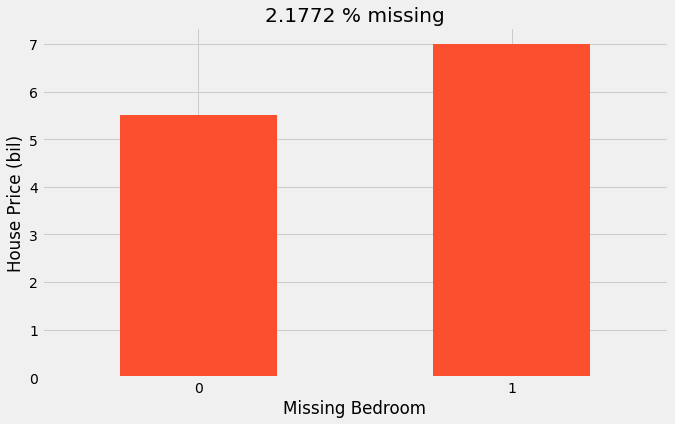

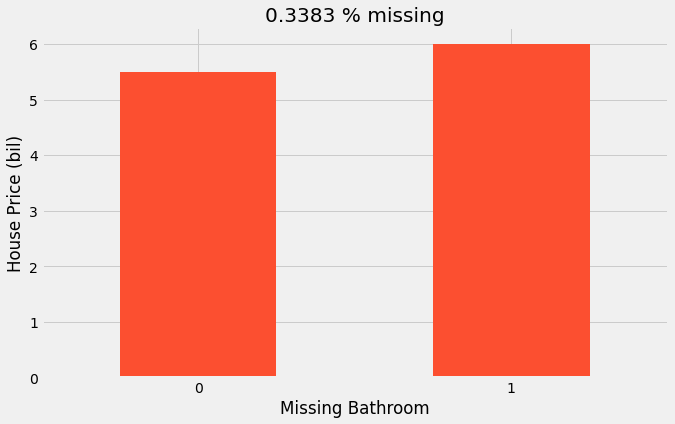

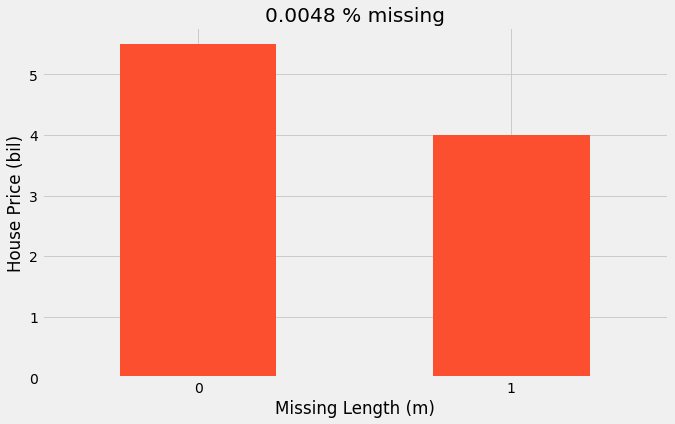

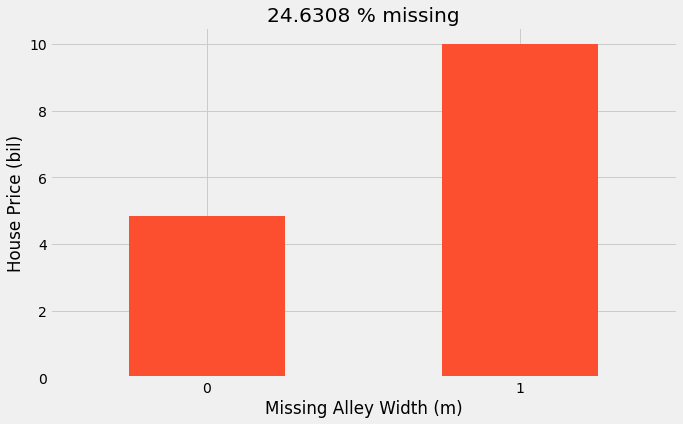

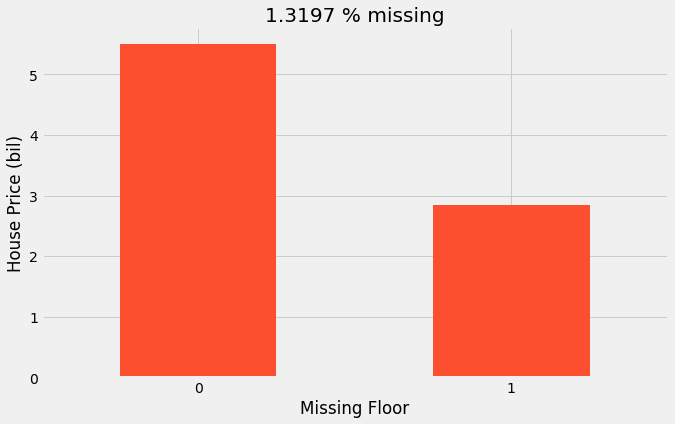

In [25]:
#Find the relationship between missing values and the House Price
for feature in features_with_na:
    data = df.copy()
    #Make a variable that indicates 1 if the observations was missing and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0)
    #Calculate the mean Price where the information is missing or not
    data.groupby(feature)['Price (bil)'].median().plot(kind='bar',figsize=(10,6),color=mypal[1])
    plt.ylabel('House Price (bil)')
    plt.xlabel(f'Missing {feature}')
    plt.xticks(rotation=0)
    plt.title(f'{np.round(df[feature].isnull().mean()*100,4)} % missing')
    plt.show()

- Here with the relationship between the missing values and the dependent variables is clearly visible. So we need to replace these nan values with some meaningful which we will do in feature engineering.

### Numerical variables

In [26]:
#List of numerical variables
numerical_features = list(df.select_dtypes(include=['float','int']).columns)
print(f'Number of numerical variables: {len(numerical_features)}')
#Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 26


,Bedroom,Bathroom,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
1,4.0,4.0,103.0,103.0,19.00,5.30,NaN,9.80,95.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,2.0,2.0,49.0,59.1,10.46,3.90,2.0,3.85,78.6,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12,2.0,2.0,114.3,130.7,24.58,4.44,4.0,8.00,70.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
16,3.0,3.0,52.4,128.4,11.51,4.57,4.0,4.80,91.6,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
20,2.0,3.0,61.0,183.0,15.35,4.00,3.0,5.60,91.8,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [27]:
#Display the summarize of descriptive statistics
df[numerical_features].describe()

,Bedroom,Bathroom,Land Area (m2),Land Used Area (m2),Length (m),Width (m),Alley Width (m),Price (bil),Price/m2 (mil),Floor,Have Mezzanine,Have Rooftop,Have Basement,Have Attic,Is Land,Near Market,Near School,Near Hospital,Near Center,Near Frontage,Securities Space,Comfortable Space,Have Car Park,Larger Rear,Alley Surface,Urgent Sale
count,20533.000000,20919.000000,20990.000000,20990.000000,20989.000000,20990.000000,15820.000000,20990.000000,20990.000000,20713.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000
mean,3.016851,2.753956,102.865703,115.961081,15.820458,5.233902,4.156780,8.133166,118.941426,2.052576,0.212530,0.208671,0.005860,0.010052,0.125679,0.762554,0.702001,0.211958,0.586517,0.455121,0.415293,0.364078,0.148737,0.042258,0.129061,0.061410
std,3.197004,3.164821,326.361269,126.864546,11.009583,4.390487,6.132586,10.628686,76.854832,1.250410,0.409107,0.406368,0.076327,0.099759,0.331495,0.425528,0.457390,0.408705,0.492470,0.497994,0.492784,0.481182,0.355838,0.201182,0.335276,0.240087
min,0.000000,0.000000,2.700000,0.000000,1.000000,0.800000,0.000000,0.330000,0.878800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,39.300000,50.000000,10.100000,3.700000,2.600000,3.700000,66.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,59.800000,90.050000,14.090000,4.070000,3.900000,5.500000,102.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,90.000000,155.200000,19.000000,5.200000,5.000000,9.000000,151.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,85.000000,20310.000000,4909.600000,691.700000,152.000000,700.000000,610.000000,1500.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Binary features

In [28]:
binary_features = [feature for feature in numerical_features if len(df[feature].dropna().unique())==2]
len(binary_features)

16

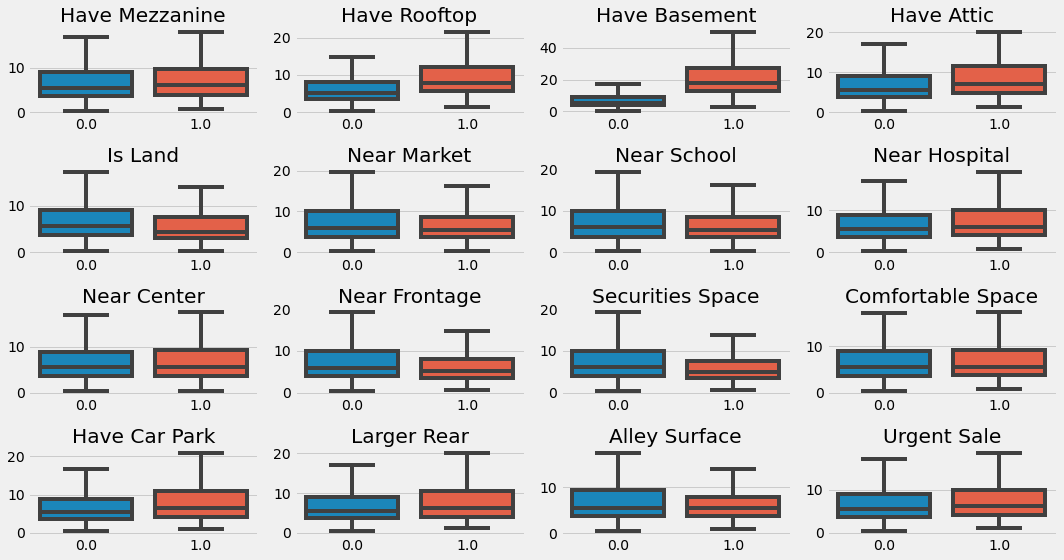

In [29]:
#Relationship between 16 binary features with the House Price
fig, axs = plt.subplots(4, 4, figsize=(15, 8))
row = 0
col = 0

for i in range(1,17):
    if (i % 4 == 1) and (i > 1):
        row += 1
        col = 0
    sns.boxplot(x=binary_features[i-1],y='Price (bil)',data=df,showfliers=False,ax=axs[row,col])
    axs[row,col].set(ylabel='',xlabel='',title=f'{binary_features[i-1]}')
    col += 1
plt.tight_layout()
plt.show()

- There are clearly different House Price in Have Rooftop, Have Basement, Have Attic, Is Land, Have Car Park features.

#### Discrete variables

In [30]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=100\
    and feature not in binary_features]
discrete_features

['Bedroom', 'Bathroom', 'Floor']

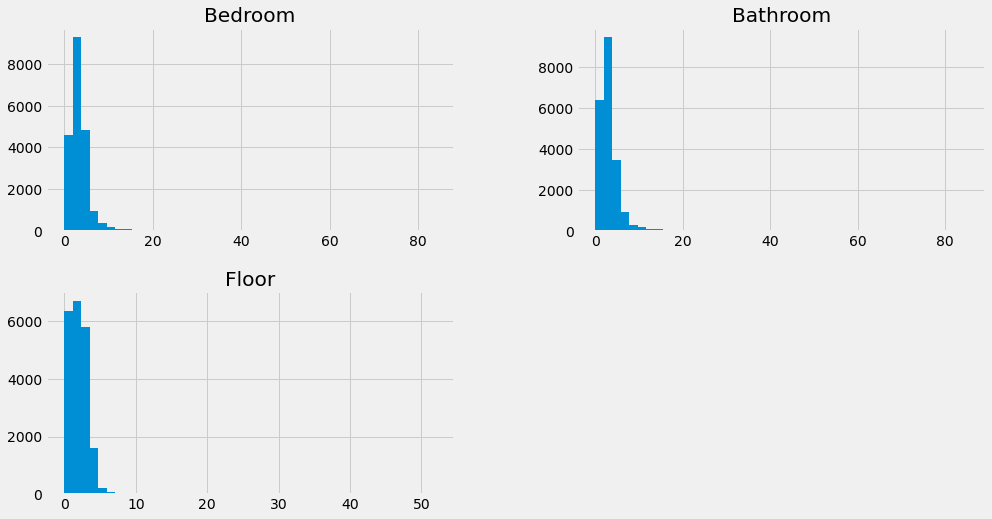

In [31]:
df[discrete_features].hist(bins=44,figsize=(15,8))
plt.show()

In [32]:
#Segment these discrete features
discrete_df = df[discrete_features]
discrete_df['Price (bil)'] = df['Price (bil)']
def room_mapping(room):
    if room == 0:
        return 'Land'
    elif room <= 5:
        return 'No more than 5'
    elif room <= 10:
        return 'No more than 10'
    elif room <= 20:
        return 'No more than 20'
    else:
        return 'More than 20'

def floor_mapping(floor):
    if floor == 0:
        return 'Land'
    elif floor <= 5:
        return 'No more than 5'
    else:
        return 'More than 5'

discrete_df['Bedroom'] = discrete_df['Bedroom'].apply(room_mapping)
discrete_df['Bathroom'] = discrete_df['Bathroom'].apply(room_mapping)
discrete_df['Floor'] = discrete_df['Floor'].apply(floor_mapping)

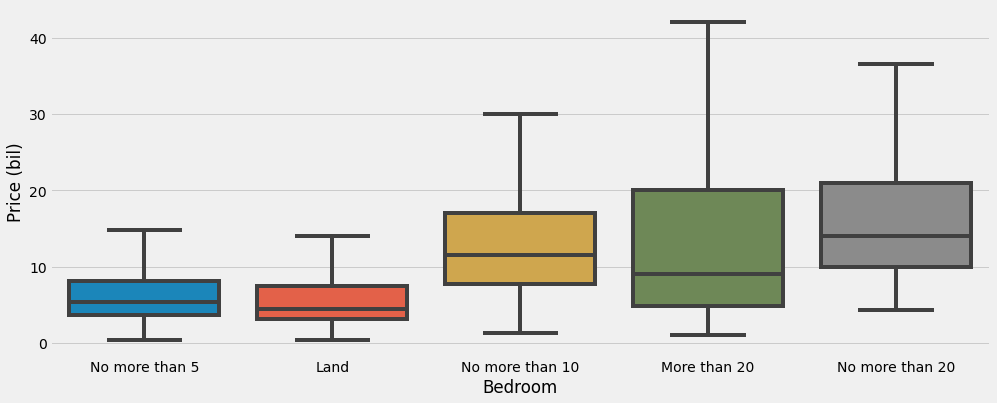

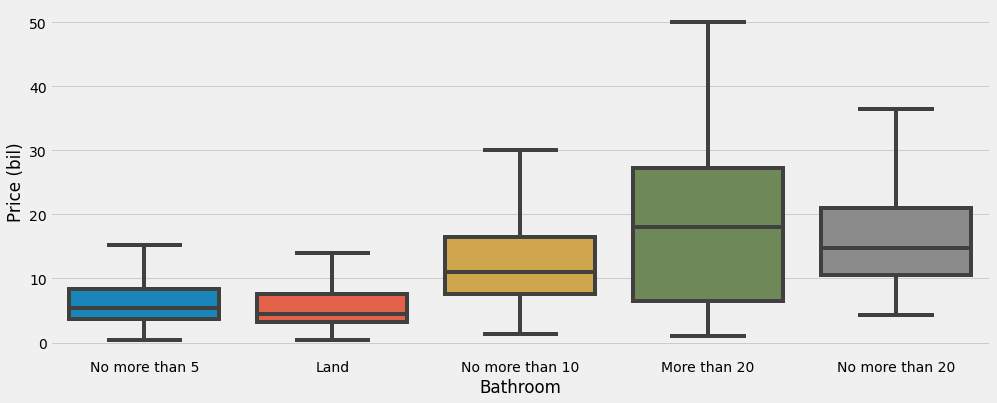

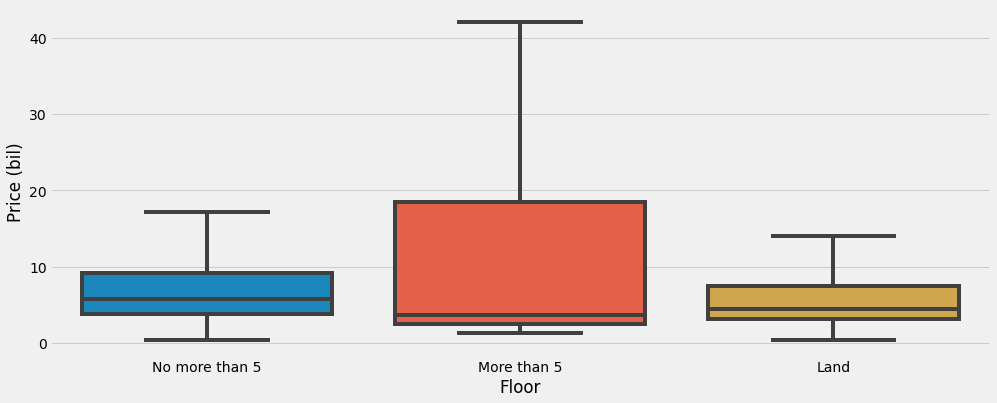

In [33]:
#Relationship between discrete variables and House Price
for feature in discrete_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=feature,y='Price (bil)',data=discrete_df,showfliers=False)
    plt.show()

- It seems that there more room or more floor, the more price but that does not happen in all cases.

#### Continuous variables

In [34]:
continuous_features = [feature for feature in numerical_features if feature not in binary_features+discrete_features]
continuous_features

['Land Area (m2)',
 'Land Used Area (m2)',
 'Length (m)',
 'Width (m)',
 'Alley Width (m)',
 'Price (bil)',
 'Price/m2 (mil)']

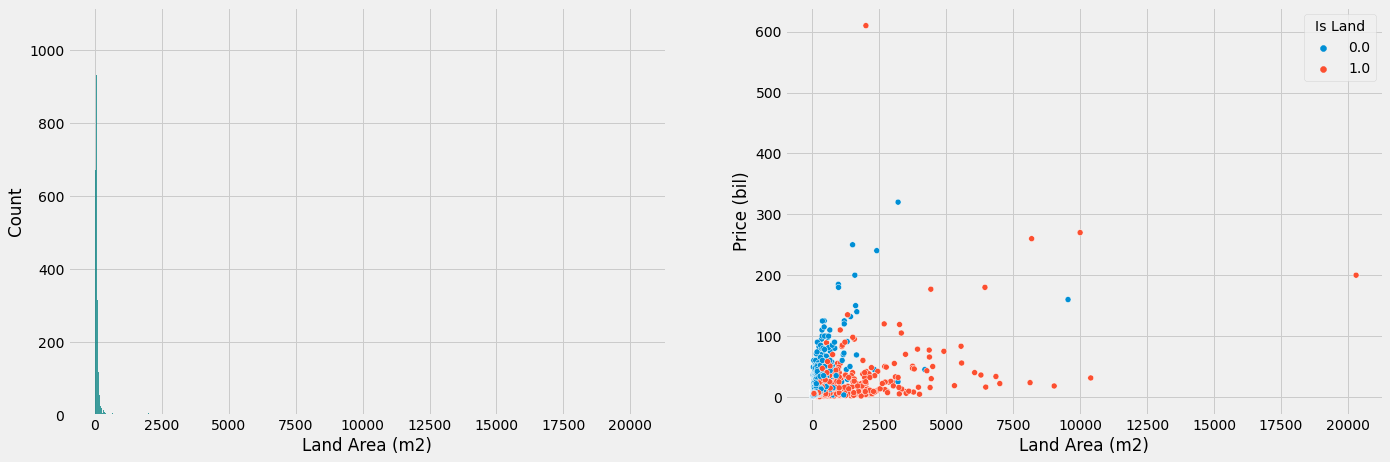

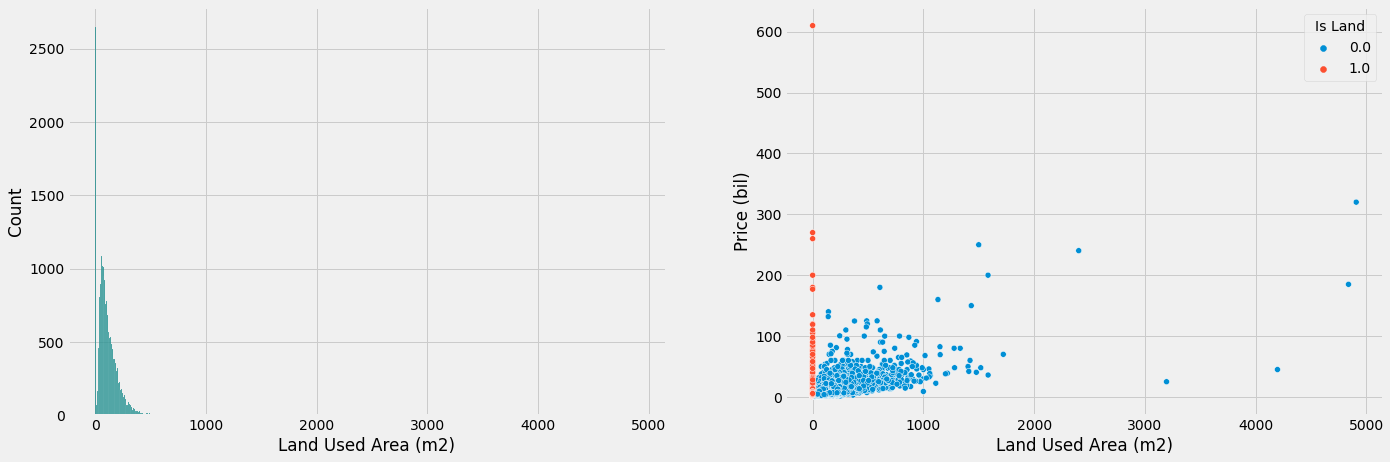

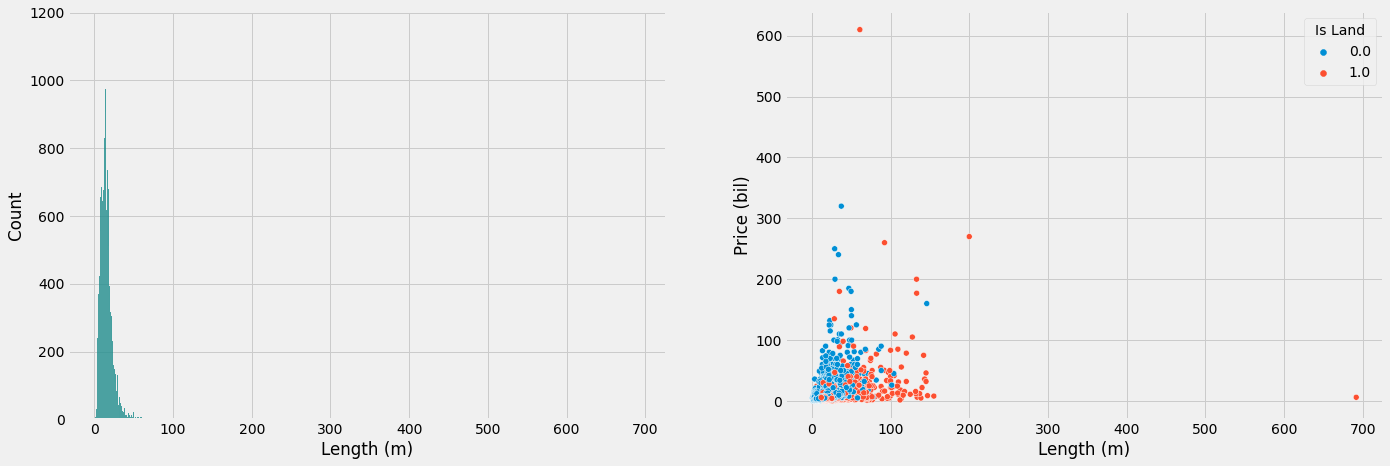

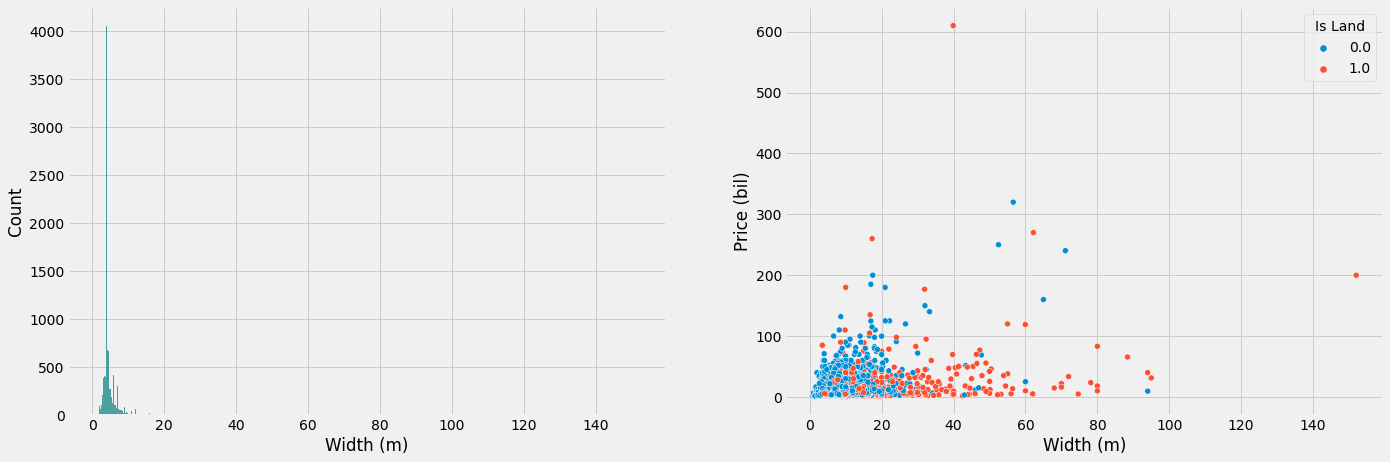

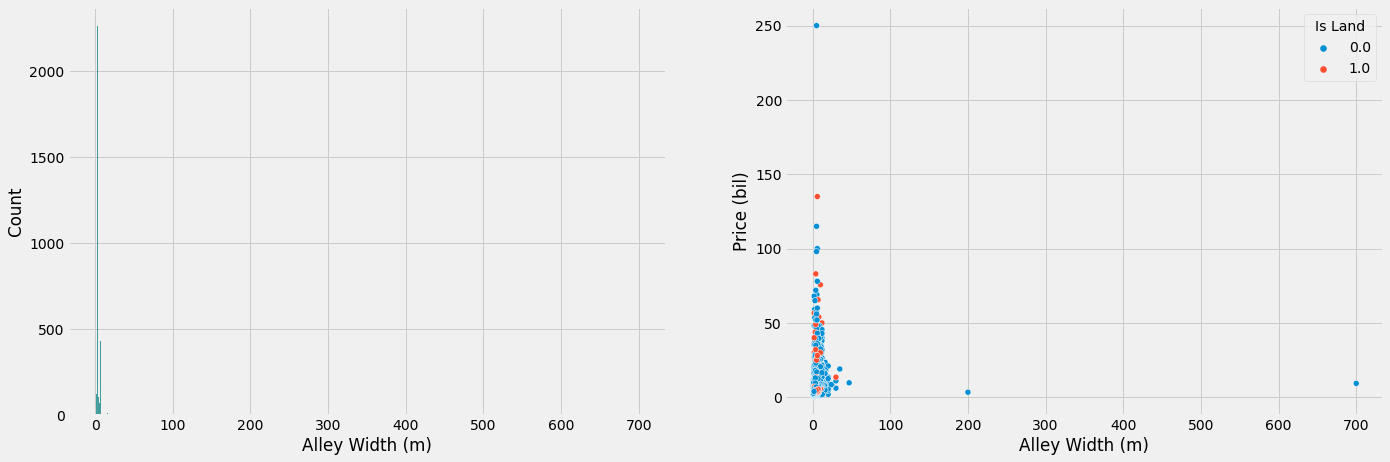

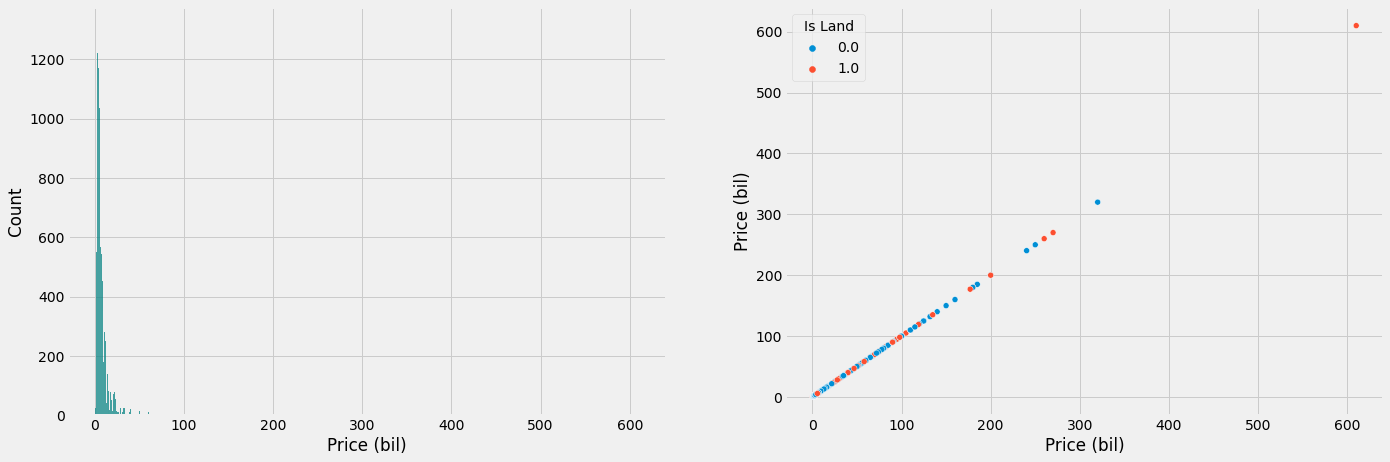

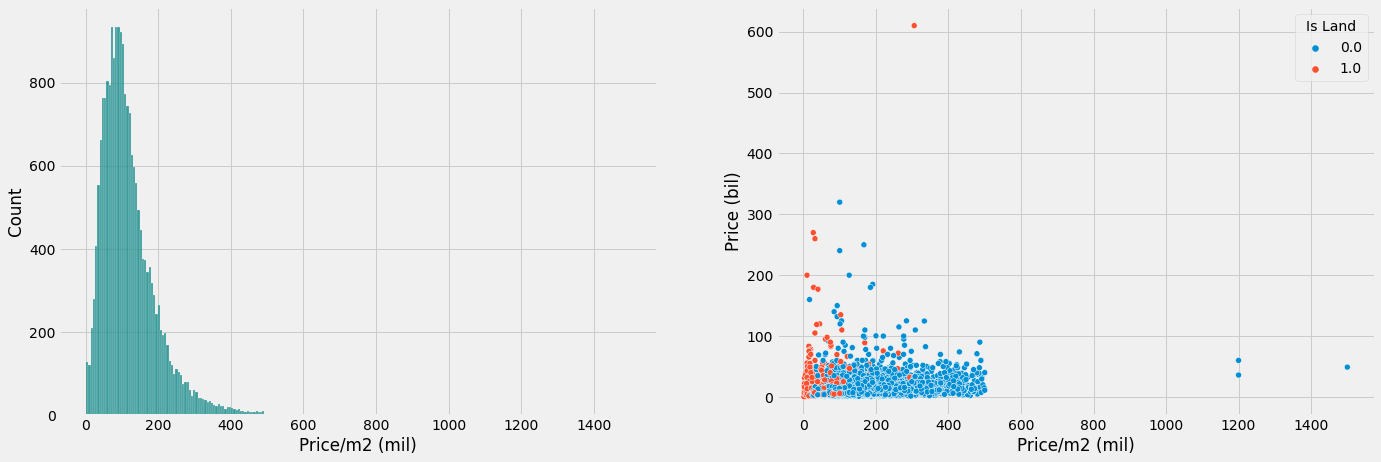

In [35]:
#Creating histogram to understand the distribution. Then analyze the relationship between the continuous values and House Price
for feature in continuous_features:
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price (bil)',data=df,hue='Is Land')
    plt.show()

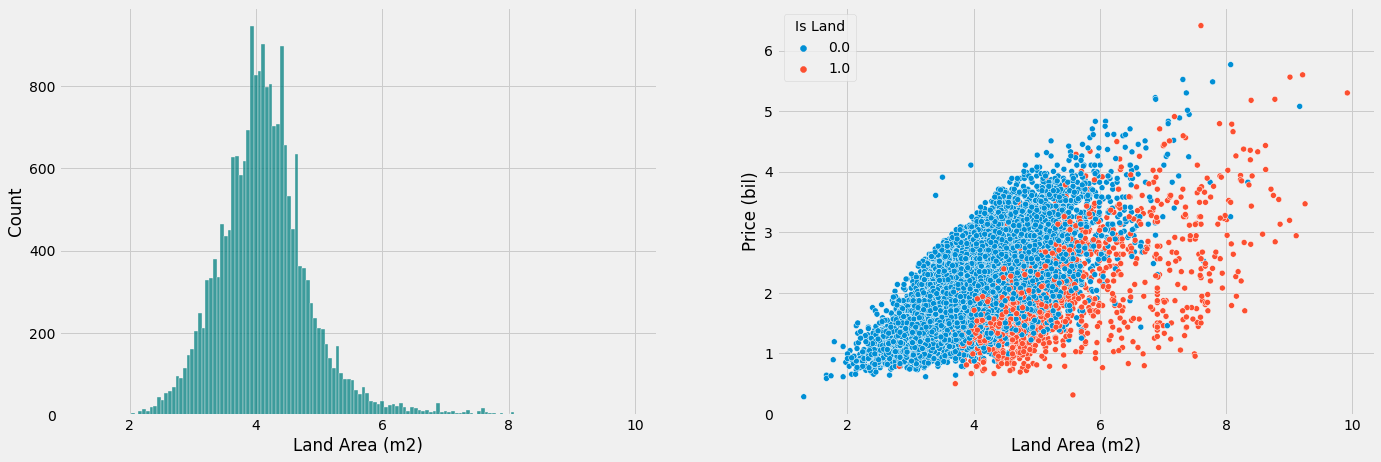

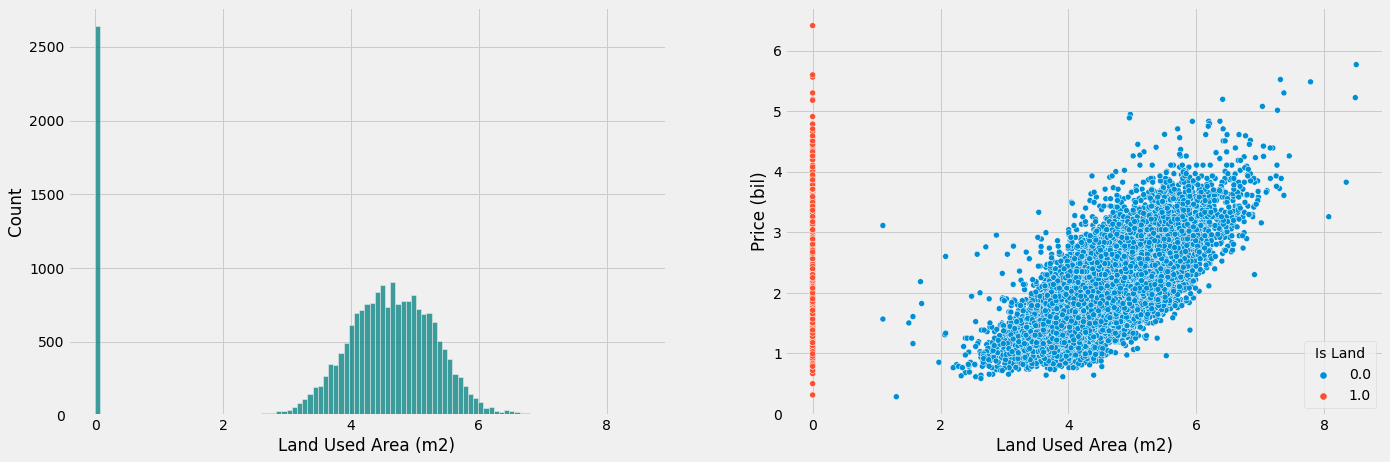

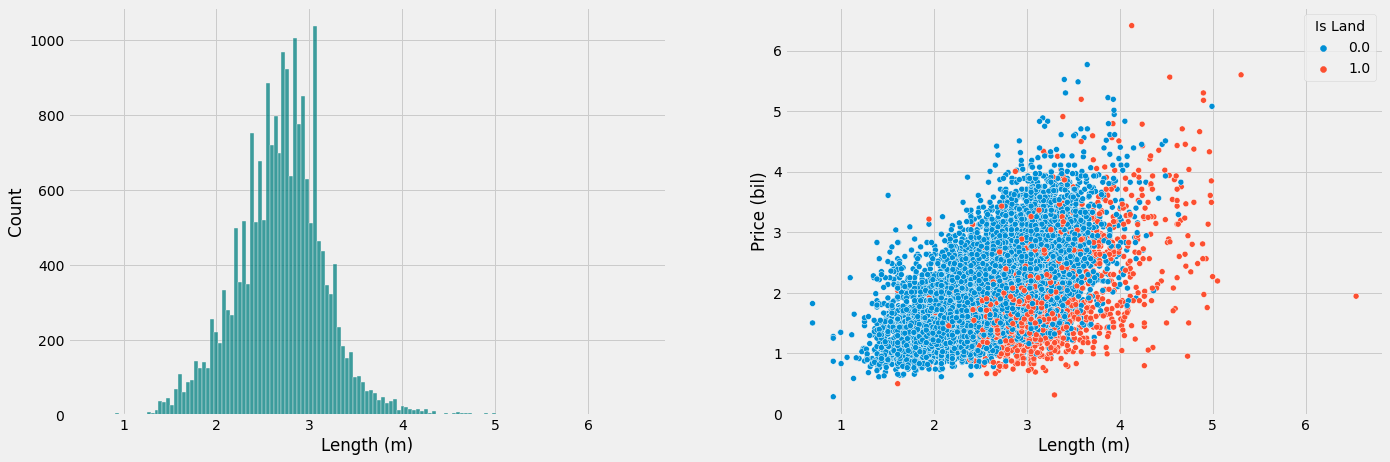

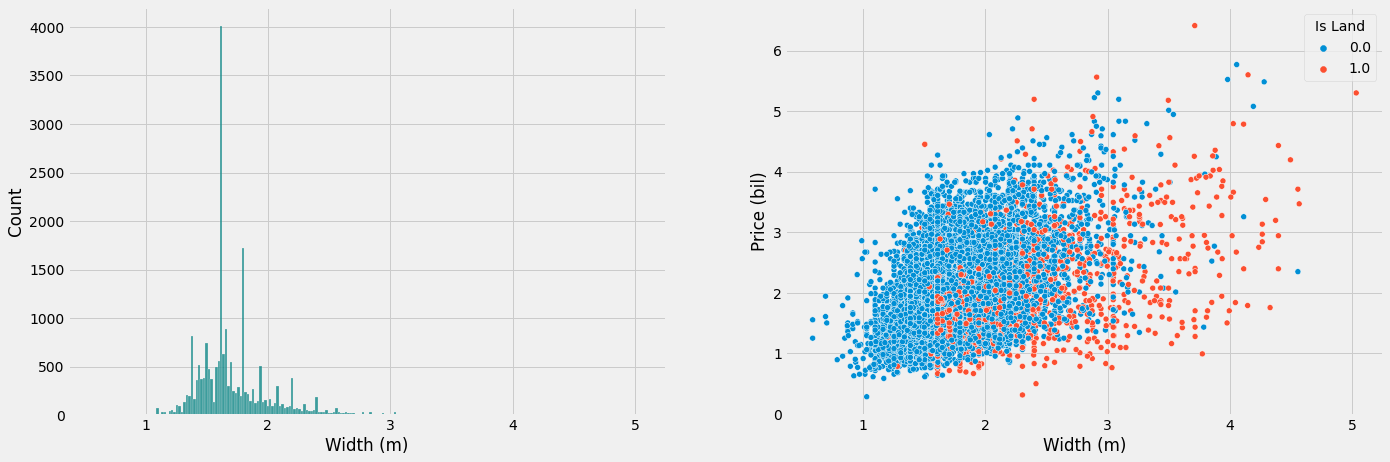

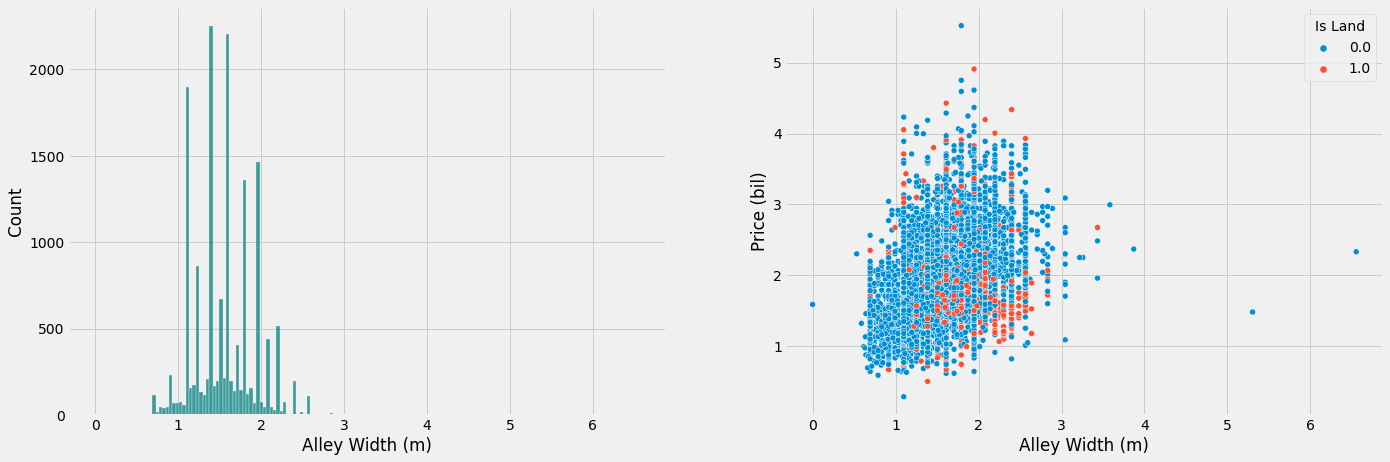

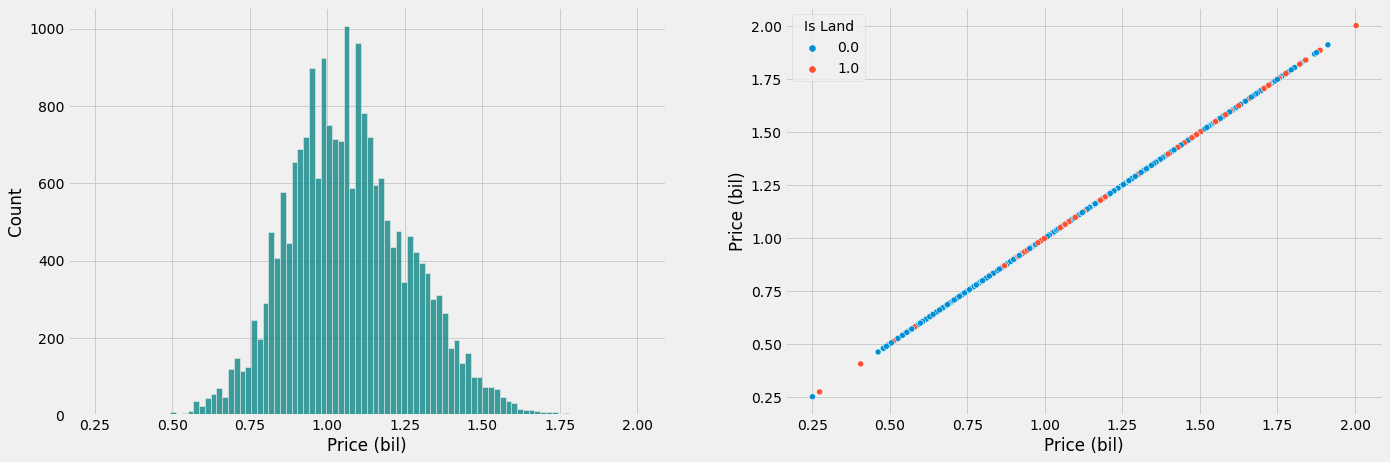

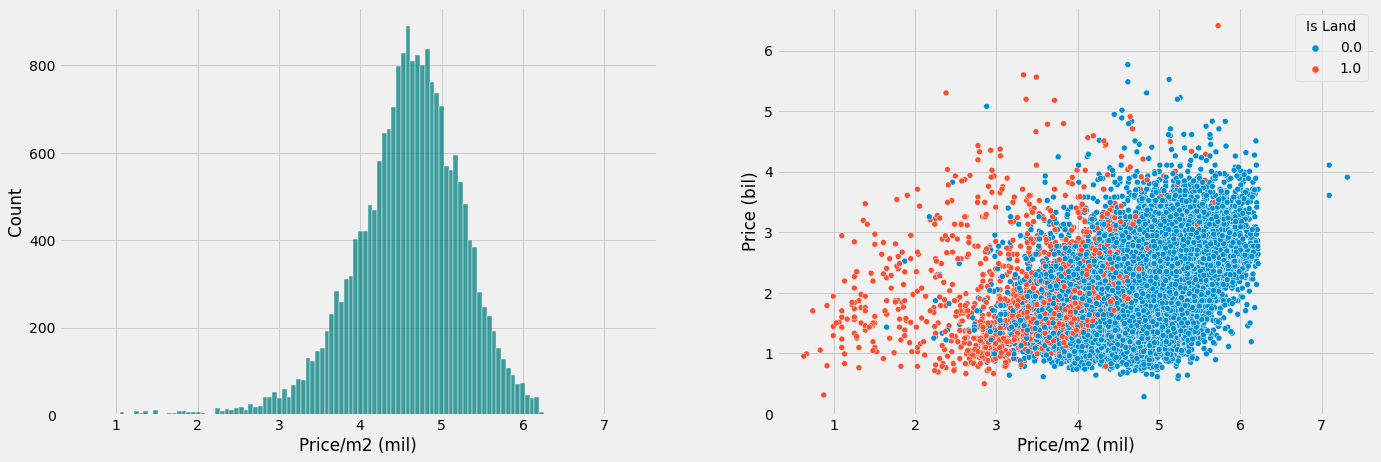

In [36]:
#Because all the distribution of continuous variables are right skew, we will use logarithm transformation for these variables
for feature in continuous_features:
    df_copy = df.copy()
    df_copy[feature] = np.log(df_copy[feature]+1)
    df_copy['Price (bil)'] = np.log(df_copy['Price (bil)']+1)
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df_copy,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price (bil)',data=df_copy,hue='Is Land')
    plt.show()

- There is a visible positive relationship between the House price of each continuous feature.

#### Outlier

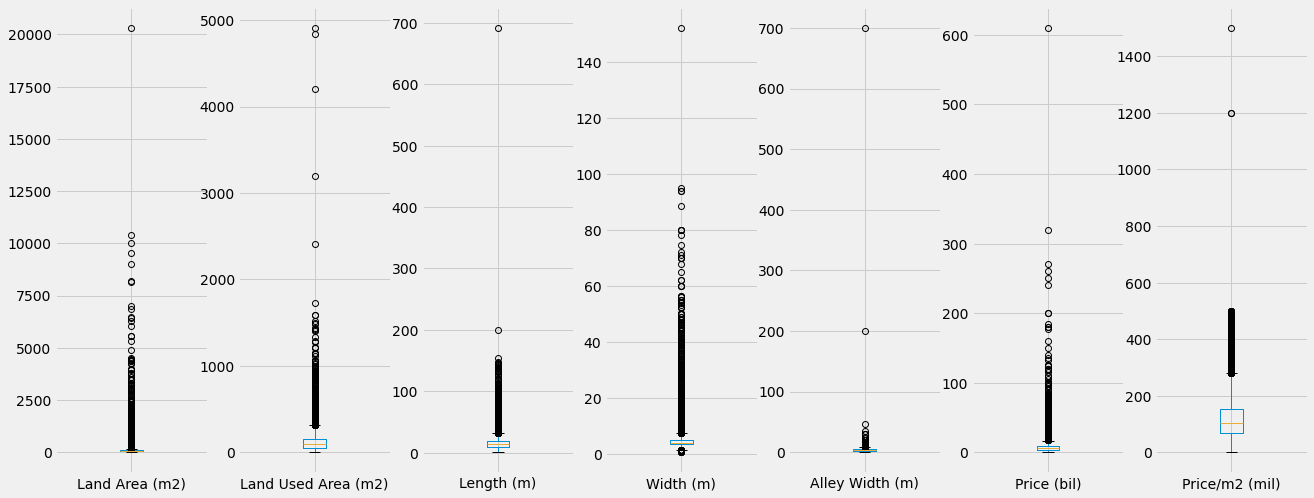

In [37]:
df[continuous_features].plot(kind='box',figsize=(20,8),subplots=True)
plt.show()

- There are so many outliers in each features.

### Categorical variables

In [38]:
#List of categorical variables
categorical_features = list(df.select_dtypes(include='object').columns)
print(f'Number of categorical variables: {len(categorical_features)}')
#Visualize the categorical variables
df[categorical_features].head()

Number of categorical variables: 5


,District,Category,Direction,House Status,Verification
1,district-2,"Ban nha cap 4 no hau, can goc 2 mat tien duong xe hoi phuong Binh An, Quan 2.",East,Renting,Pink book
5,district-2,"Ban nha no hau phuong Binh Trung Tay, Quan 2",South,Living,Pink book
12,district-2,"Chinh chu ban nha dep no hau, hem o to, phuong Thanh My Loi, Quan 2.",South,Empty,Pink book
16,district-2,"Ban nha hem xe hoi, phuong Binh Trung Tay, Tp.Thu Duc",South,Living,Pink book
20,district-2,"Ban nha moi dep, hem xe hoi, phuong Binh Trung Tay, Tp.Thu Duc",North,Empty,Pink book


#### Cardinality and Relationship with House Price

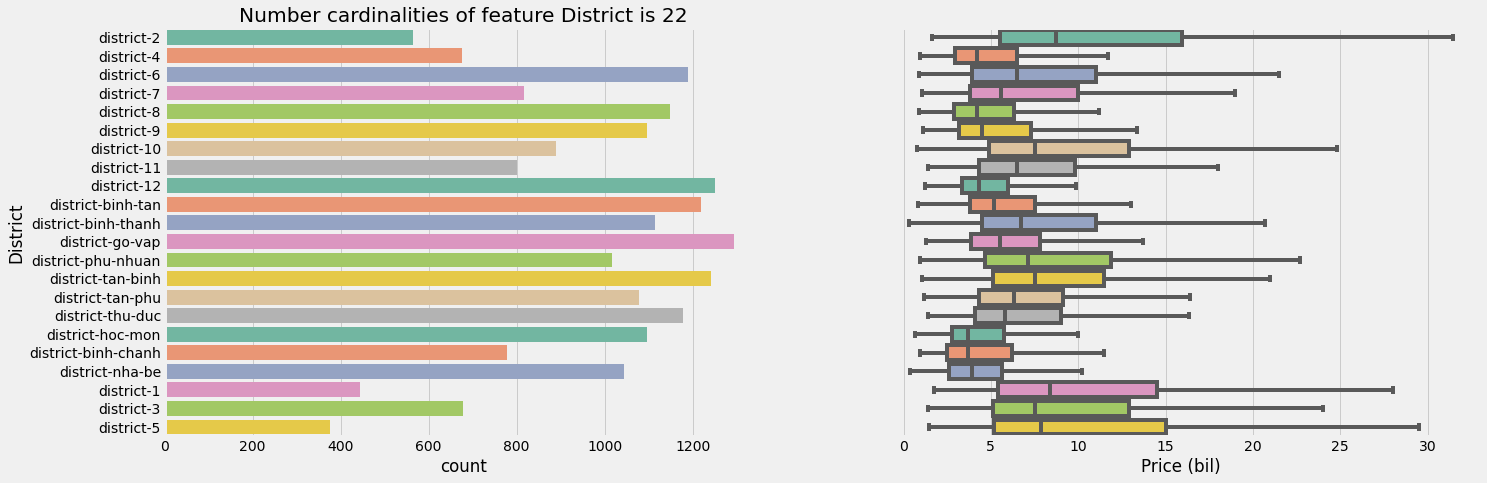

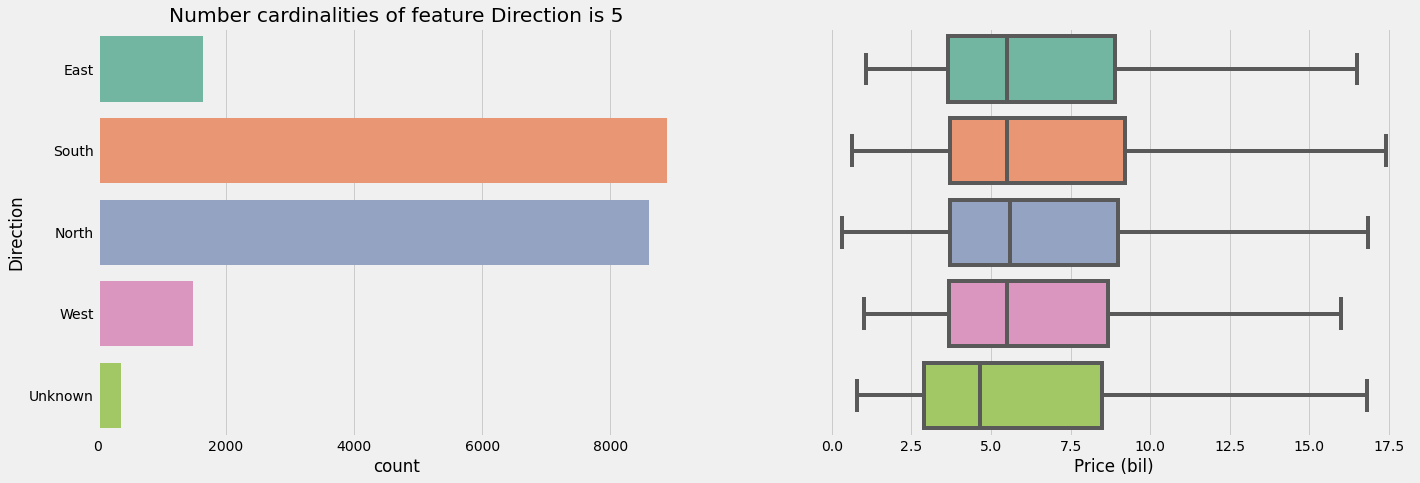

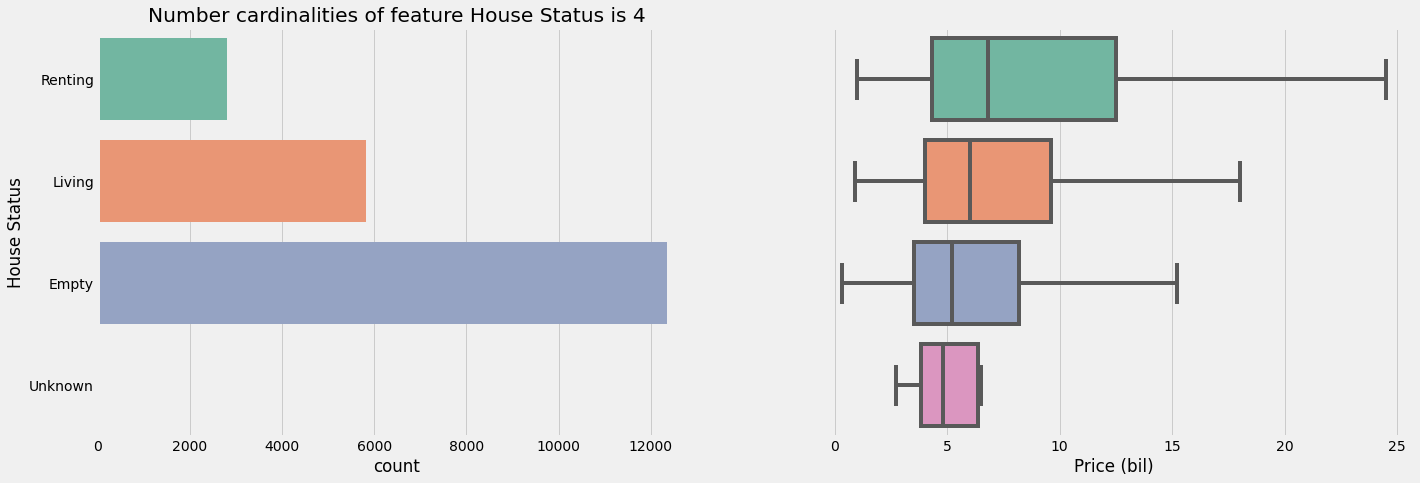

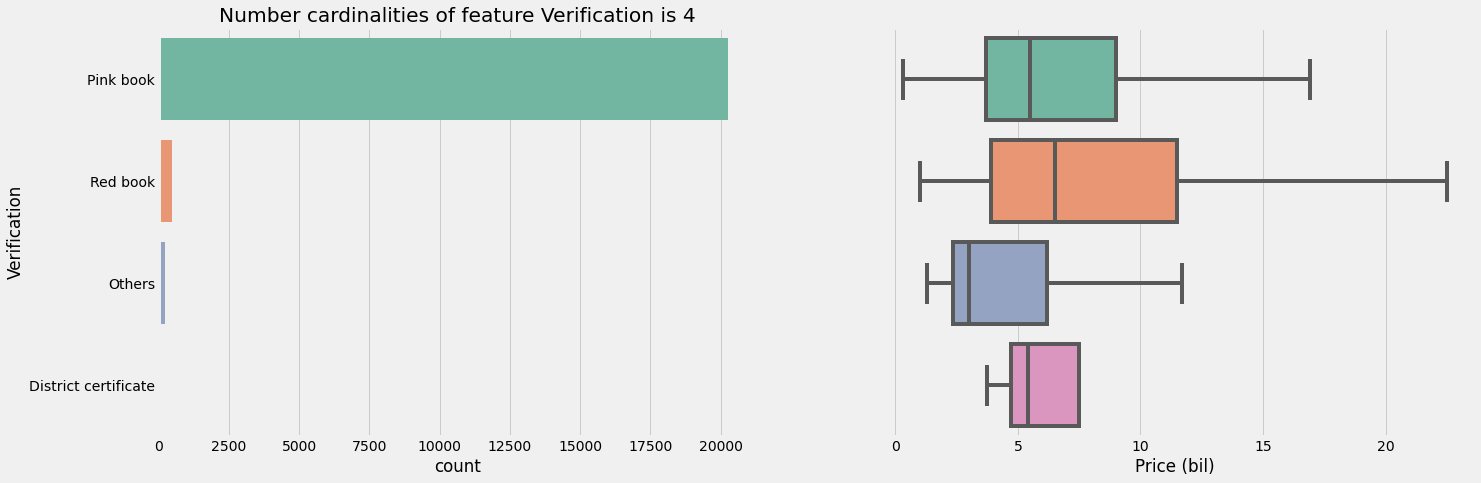

In [39]:
for feature in categorical_features:
    if feature != 'Category':
        df_copy = df.copy()
        fig, axs = plt.subplots(1,2,figsize=(21,7))
        sns.countplot(y=feature,data=df_copy,palette='Set2',ax=axs[0])
        cardinality = len(df[feature].unique())
        axs[0].set_title(f'Number cardinalities of feature {feature} is {cardinality}')
        sns.boxplot(y=feature,x='Price (bil)',data=df_copy,showfliers=False,palette='Set2',ax=axs[1])
        axs[1].get_yaxis().set_visible(False)
plt.show()

In [40]:
df.to_csv('data/cleaned_data.csv',index=False)